In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [21]:
#importing files
dfa = pd.read_csv("Lab2 D1A.csv")
dfb = pd.read_csv("Lab2 D1B.csv")
dfc = pd.read_csv("Lab2 D1C.csv")

# Task 1:

In [22]:
common_cols = list(set(dfa.columns) & set(dfb.columns))
print("Common cols between the two datasets are: ", common_cols)

Common cols between the two datasets are:  ['county', 'name', 'population']


In [23]:
merged = pd.merge(dfa, dfb, on=common_cols, how="outer")

#saving the merged file
merged.to_csv("merged.csv", index=False)

#finding the shape of dataset
merged.shape

(27033, 9)

In [24]:
common_cols = list(set(dfa.columns) & set(dfc.columns))
print("Common cols between the two datasets are: ", common_cols)

Common cols between the two datasets are:  ['county']


In [25]:
comboAC = pd.merge(dfa, dfc, on=common_cols, how="inner")
comboAC.to_csv("comboAC.csv", index=False)

comboAC.shape

(4221333, 7)

# Task 2

In [27]:
common = list(set(dfb.columns) & set(dfc.columns) & set(dfa.columns))
print("Common cols between the three datasets are: ", common)

country_values = dfa["county"].unique()
print("Unique values in 'county' attribute are: ", country_values)

Common cols between the three datasets are:  ['county']
Unique values in 'county' attribute are:  ['BRISTOL' 'WORCESTER' 'PLYMOUTH' ... 'GREEN LAKE' 'VILAS' 'ST. FRANCIS']


In [ ]:
n = 6
np.random.seed(42)

attributes = {
    "county": ['BRISTOL', 'WORCESTER', 'PLYMOUTH', 'GREEN LAKE', 'VILAS', 'ST. FRANCIS'],
    "size": ['small', 'medium', 'high'],
    "cardinal direction": ['North', 'South', 'East', 'West'],
    "timings": ['full-time', 'part-time'],
    "department": ['AI', 'CS', 'DS', 'SE'], #catergorical
    "gpa": np.round(np.random.uniform(2.0, 4.0, n), 2) #continuous
}

dataframe = pd.DataFrame({
    col: (np.random.choice(values, n) if isinstance(values, list) else values)
    for col, values in attributes.items()
})

print("The customized dataframe is:\n", dataframe)

The customized dataframe is:
         county    size cardinal direction    timings department   gpa
0     PLYMOUTH   small              South  part-time         CS  3.66
1  ST. FRANCIS   small              North  part-time         DS  2.36
2  ST. FRANCIS  medium              South  full-time         CS  2.39
3        VILAS   small               East  part-time         CS  2.85
4      BRISTOL   small               West  full-time         CS  3.96
5     PLYMOUTH  medium               East  part-time         AI  2.15


In [38]:
#dropped duplicates in the county variable since the combined DF was generating billions of rows
#And the data was exploding due to multiple entries of the same county in all 4 datasets
dfa = dfa.drop_duplicates(subset=['county'])
dfb = dfb.drop_duplicates(subset=['county'])
dfc = dfc.drop_duplicates(subset=['county'])
dataframe = dataframe.drop_duplicates(subset=['county'])

#Before Merging the datasets, checking the shapes of all datasets
print(f"dfa shape:{dfa.shape}\ndfb shape:{dfb.shape}\ndfc shape:{dfc.shape}\ndataframe shape:{dataframe.shape}")

#merging the 4 datasets
modifiedData = dfa.merge(dfb, on='county', how="inner") \
                  .merge(dfc, on='county', how="inner") \
                  .merge(dataframe, on='county', how="inner")

print("The final merged dataframe is:\n", modifiedData)

#after merging the sahpe pf the dataset
print("The shape of the dataset after meging:", modifiedData.shape)

dfa shape:(1374, 5)
dfb shape:(1374, 7)
dfc shape:(1374, 3)
dataframe shape:(4, 6)
The final merged dataframe is:
      fid                                      name_x  population_x  \
0   9001               NEW ENGLAND CHRISTIAN ACADEMY           136   
1   9004  SOUTHEAST ALTERNATIVE SCHOOL-MIDDLE SCHOOL             5   
2  20963                             CONSERVE SCHOOL            65   
3  20969                    CALVARY CHRISTIAN SCHOOL           151   

        county   latitude                                      name_y  \
0      BRISTOL  41.758597               NEW ENGLAND CHRISTIAN ACADEMY   
1     PLYMOUTH  41.818210  SOUTHEAST ALTERNATIVE SCHOOL-MIDDLE SCHOOL   
2        VILAS  46.173898                             CONSERVE SCHOOL   
3  ST. FRANCIS  35.024865                    CALVARY CHRISTIAN SCHOOL   

   population_y  longitude                              level  enrollment  \
0           136 -71.175801  Combined elementary and secondary         120   
1             

# Task 3:

### Data Preprocessing

In [ ]:
train_csv = pd.read_csv("train.csv")

print("The shape of train data is: ", train_csv.shape)
train_csv.head(10)

The shape of train data is:  (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
5,13,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87975.750000,0
6,14,2,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94956.660000,0
7,18,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,251638.950000,0
8,20,2,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101962.020000,0
9,23,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,356463.060000,0


                             var3     var38     var15  imp_op_var39_comer_ult1
var3                     1.000000  0.000071 -0.004452                 0.005989
var38                    0.000071  1.000000  0.006497                 0.012546
var15                   -0.004452  0.006497  1.000000                 0.094762
imp_op_var39_comer_ult1  0.005989  0.012546  0.094762                 1.000000


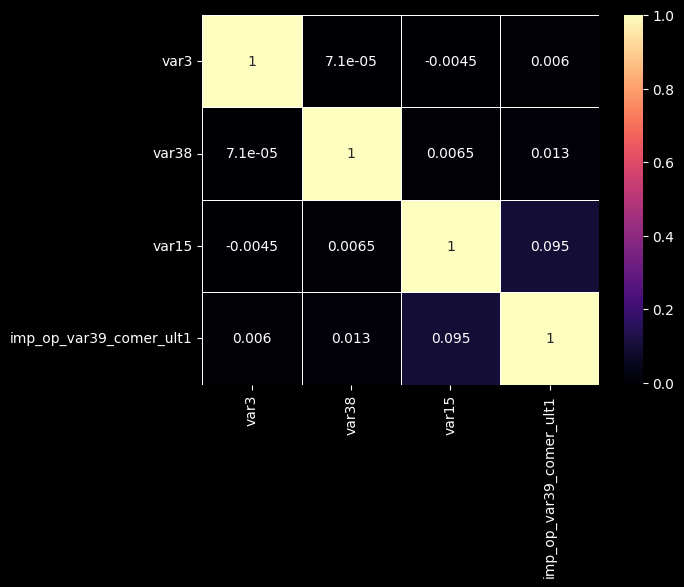

In [55]:
corr = train_csv[["var3", "var38", "var15", "imp_op_var39_comer_ult1"]].corr()
print(corr)
sns.heatmap(corr, annot=True, linecolor='white',linewidths=0.5, cmap="magma")
plt.show()


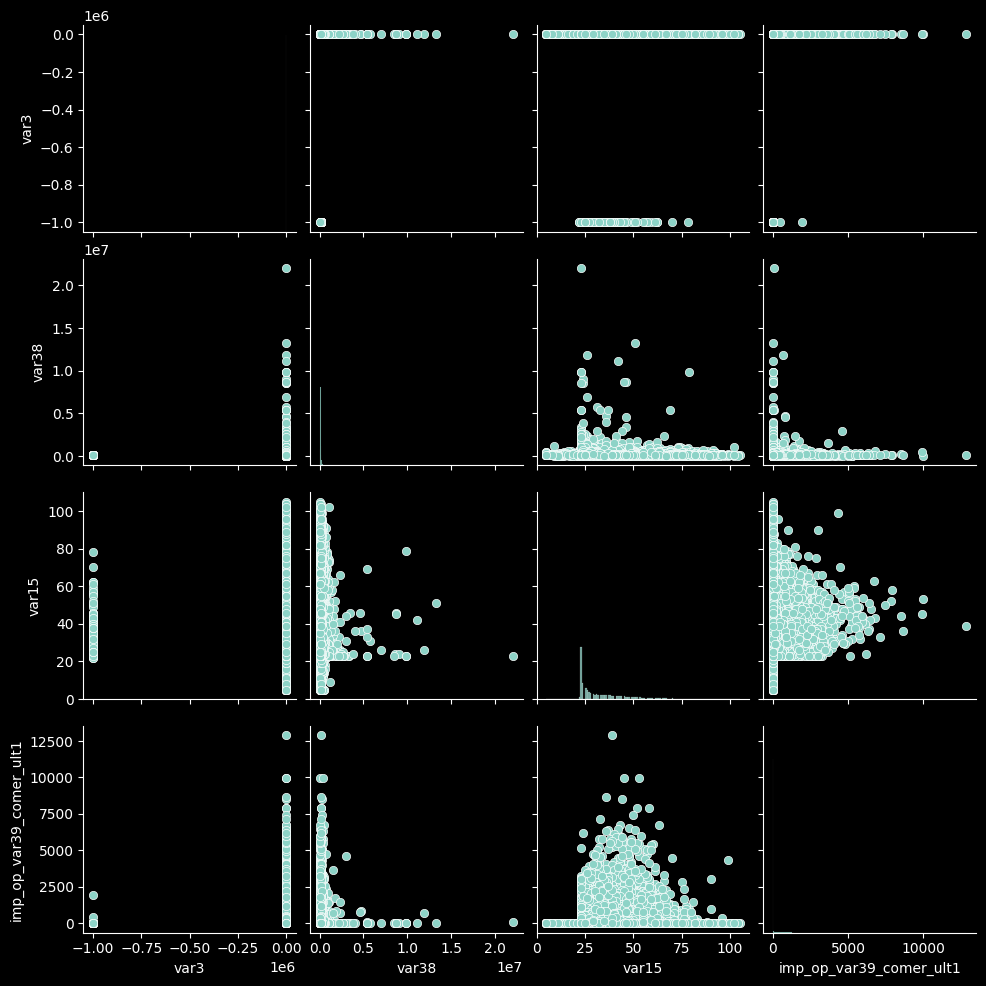

In [56]:
#linearality shown through scatter plot
sns.pairplot(train_csv[["var3", "var38", "var15", "imp_op_var39_comer_ult1"]])

### Explanation of scatter plot:
#### most of the plots looks non linear as they are not forming a staright line pattern.
#### instead, the relationships look scattered, clustered, or heavily concentrated along axes with some outliers.

In [59]:
#checking null values and filling them
print(train_csv.isnull().sum())

#from the results we can see that there are no null values
#but just to show how imputation works, we will write the function
train_csv.fillna(train_csv.mean(numeric_only=True),inplace=True)

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64


##### Distribution of Var3 by target.

##### Boxplot of Var15 vs. target.

##### Correlation heatmap of top 10 variables.

##### Average Var38 grouped by target.

##### Scatterplot between Var38 and Var15.

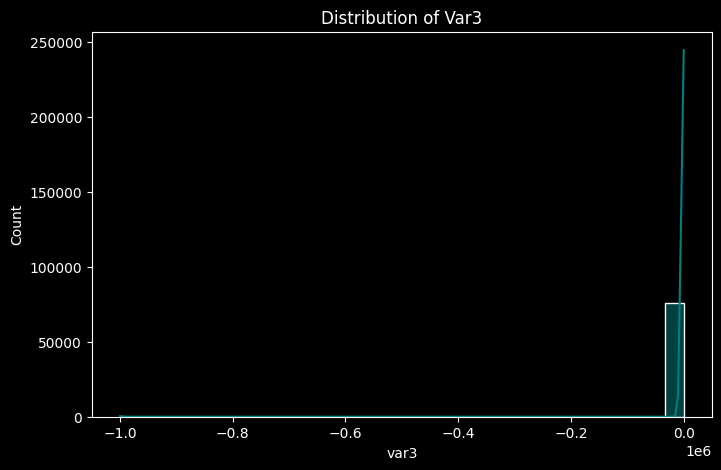

C:\Users\Laibaa\AppData\Local\Temp\ipykernel_23344\179006614.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="TARGET", y="var15", data=train_csv, palette="coolwarm")


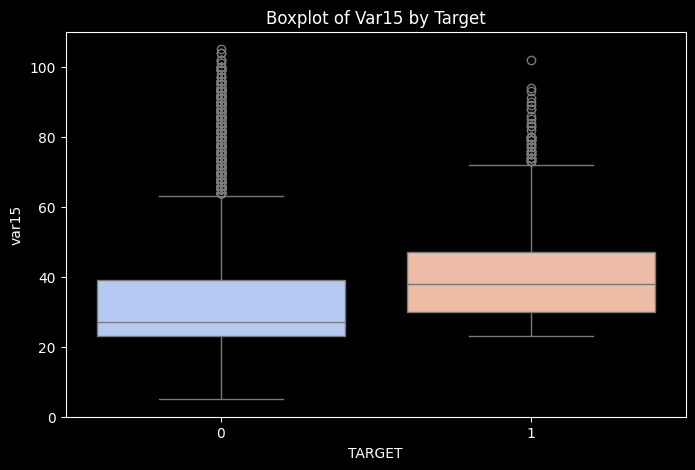

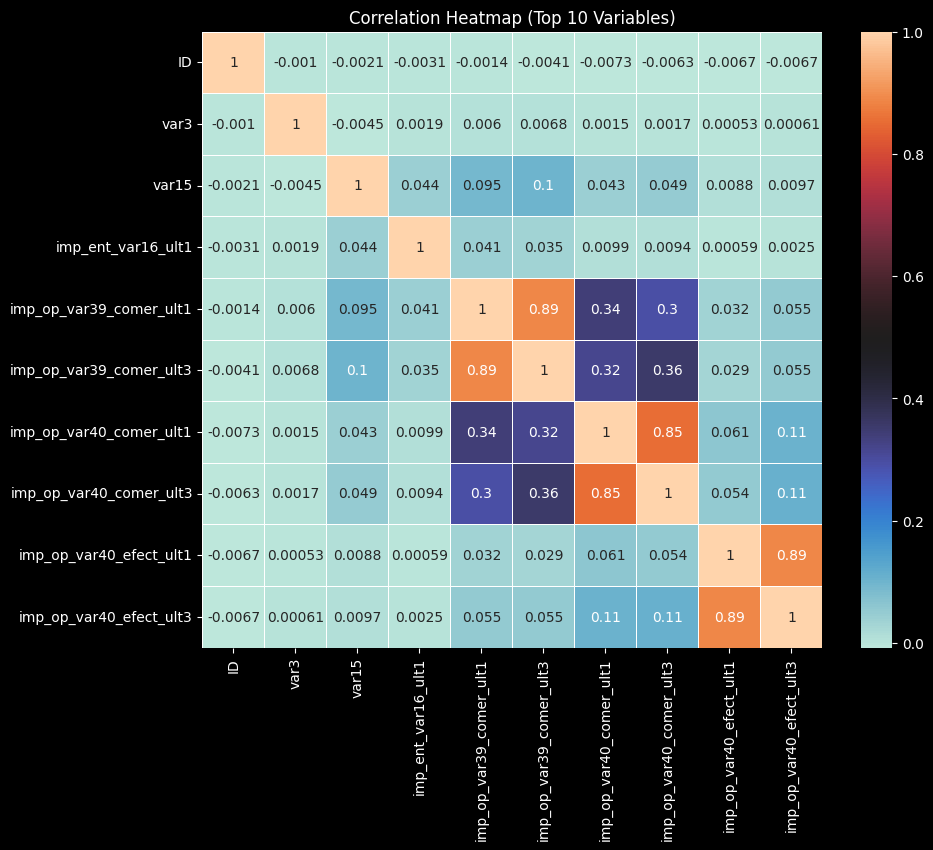

C:\Users\Laibaa\AppData\Local\Temp\ipykernel_23344\179006614.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TARGET", y="var38", data=train_csv, estimator="mean", palette="viridis")


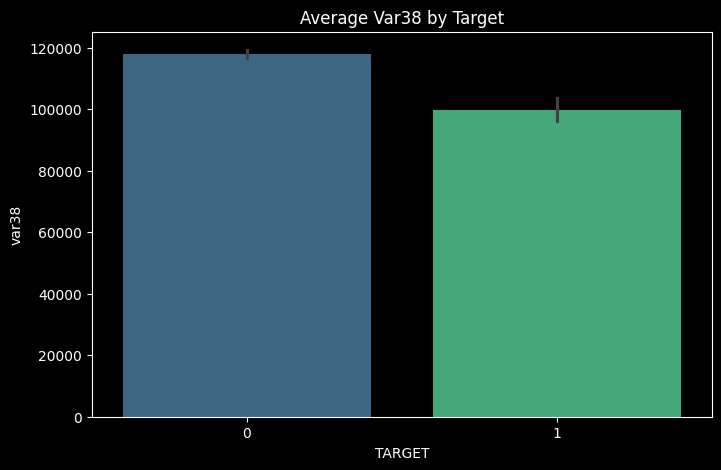

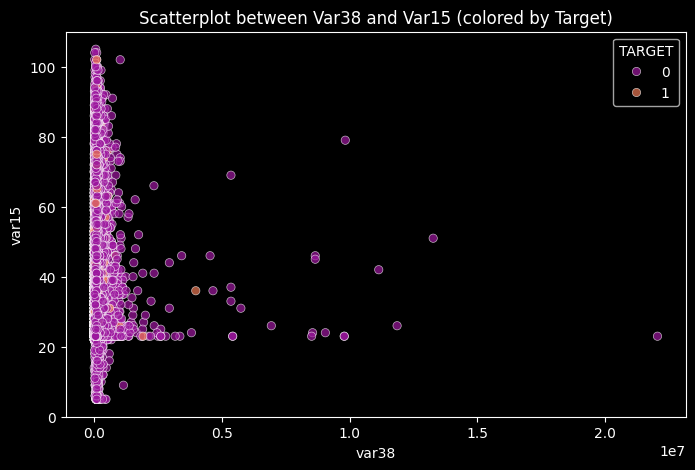

In [63]:
# 1. Distribution of Var3
plt.figure(figsize=(8,5))
sns.histplot(train_csv["var3"], bins=30, kde=True, color="teal")
plt.title("Distribution of Var3")
plt.show()

# 2. Boxplot of Var15 vs Target
plt.figure(figsize=(8,5))
sns.boxplot(x="TARGET", y="var15", data=train_csv, palette="coolwarm")
plt.title("Boxplot of Var15 by Target")
plt.show()

# 3. Correlation Heatmap of top 10 variables
plt.figure(figsize=(10,8))
corr = train_csv.corr().iloc[:10, :10]   # Top 10 vars
sns.heatmap(corr, cmap="icefire", annot=True, linewidths=0.5)
plt.title("Correlation Heatmap (Top 10 Variables)")
plt.show()

# 4. Average Var38 grouped by target
plt.figure(figsize=(8,5))
sns.barplot(x="TARGET", y="var38", data=train_csv, estimator="mean", palette="viridis")
plt.title("Average Var38 by Target")
plt.show()

# 5. Scatterplot between Var38 and Var15
plt.figure(figsize=(8,5))
sns.scatterplot(x="var38", y="var15", hue="TARGET", data=train_csv, palette="plasma", alpha=0.7)
plt.title("Scatterplot between Var38 and Var15 (colored by Target)")
plt.show()